<a href="https://colab.research.google.com/github/MadeaRiggs/Electricity_Prices_Time_Series/blob/main/Electricity_Price_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The dataset is sampled on an hourly basis. It has the following features:

1.   FullDate: Date in format yyyy-mm-dd  hh:mm:ss
2.   ElecPrice: Prices of electricity charged in Kw per hour
3.   Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T
4.   SysLoad: Total Load on system or Power consumed at time-T
5. Tmax: maximum temperature at time-T

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
electric_df= pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")
electric_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [98]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [99]:
#convert FullDate column to date-time format and set as index
electric_df['FullDate']= pd.to_datetime(electric_df['FullDate'])
electric_df.set_index(electric_df['FullDate'], inplace= True)
electric_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [100]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.2 MB


In [101]:
#check for any null values
electric_df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0, 0.5, 'Electricity price in Kw per hour')

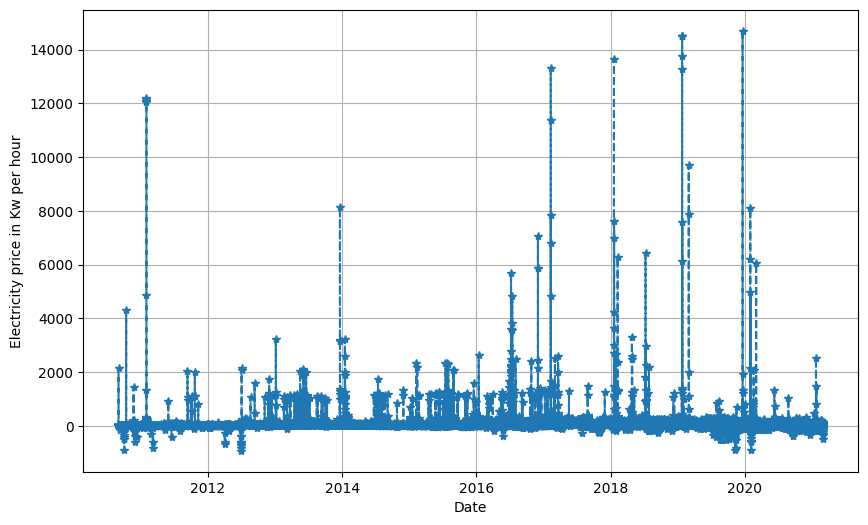

In [102]:
#plotting 'FullDate' against 'ElecPrice'
plt.figure(figsize=(10 ,6))
plt.plot(electric_df.index, electric_df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel('Date')
plt.ylabel('Electricity price in Kw per hour')

Since target variable is 'ElecPrice' plot it against the 'FullDate'

In [103]:
import statsmodels.api as sm

#Seasonal decomposition to break down the trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(electric_df['ElecPrice'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

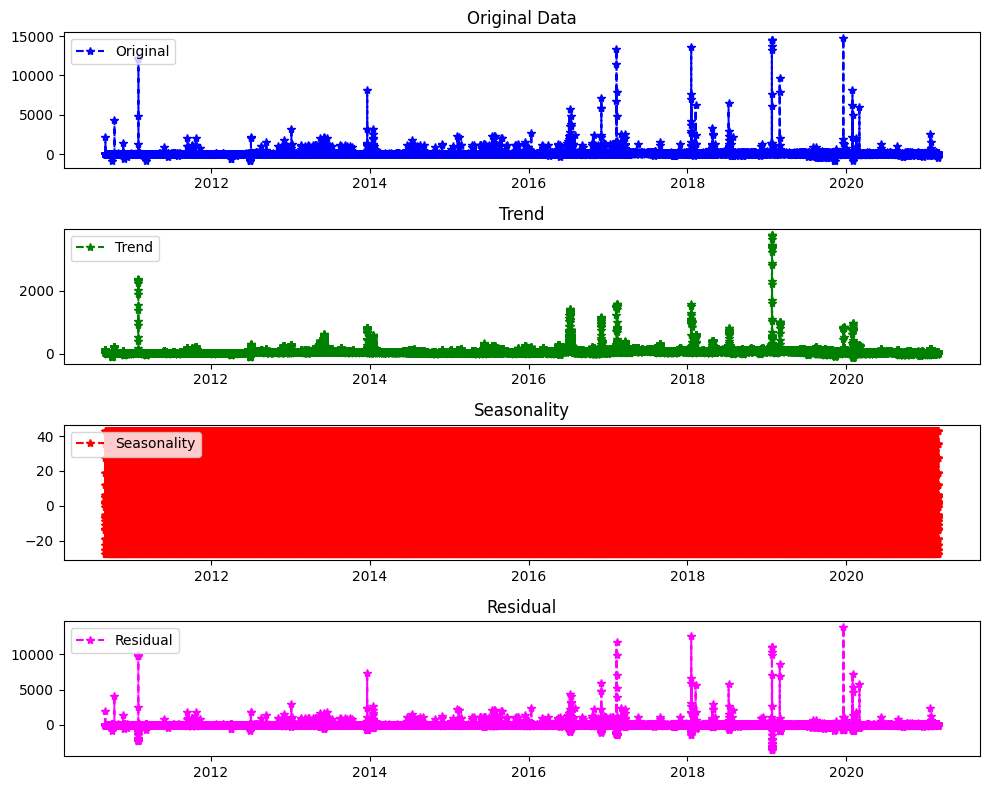

In [104]:
#plotting the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(electric_df.index, electric_df['ElecPrice'], '--', marker='*', color='b')
plt.legend(['Original'], loc="upper left")
plt.title("Original Data")

plt.subplot(4, 1, 2)
plt.plot(electric_df.index, trend, '--', marker='*', color='g')
plt.legend(['Trend'], loc="upper left")
plt.title("Trend")

plt.subplot(4, 1, 3)
plt.plot(electric_df.index, seasonal, '--', marker='*', color='r')
plt.legend(['Seasonality'], loc="upper left")
plt.title("Seasonality")

plt.subplot(4, 1, 4)
plt.plot(electric_df.index, residual, '--', marker='*', color='magenta')
plt.legend(['Residual'], loc="upper left")
plt.title("Residual")

plt.tight_layout()
plt.show()

In [105]:
# check for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(electric_df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[ 2 ]}')
print(f'No. of observations used : {adf_result[ 3 ]}')
print('Critical Values:')
for k, v in adf_result[ 4 ].items():
 print(f'{k} : {v}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
1% : -3.430421110703783
5% : -2.8615714297867108
10% : -2.56678672898094


 From this tst, we confirm that the time series is stationary as the data does not exhibit any trend or seasonality and it can be assumed to have a constant mean and variance over time

In [106]:
#split the data into train and test sets
train_df = electric_df.iloc[:2757]
test_df = electric_df.iloc[2757:]

question 11

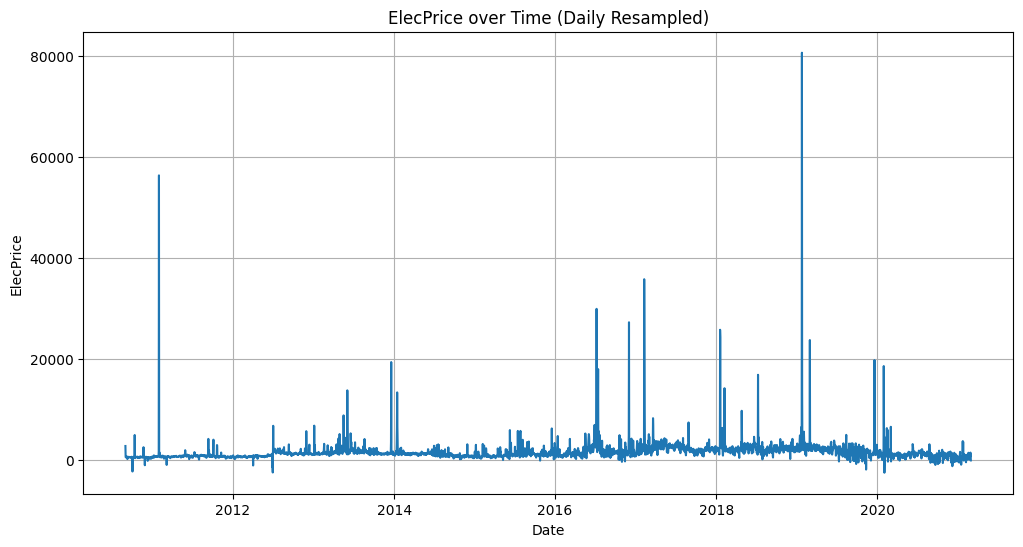

In [107]:
# Resample the data from hourly to daily and sum over the hours for each day
df_daily = electric_df.resample('D', on='FullDate').sum()

# Plot ElecPrice over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['ElecPrice'])
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over Time (Daily Resampled)')
plt.grid(True)
plt.show()

question 12

In [108]:
from statsmodels.tsa.stattools import adfuller

#perform ADF test for SysLoad
adf_result_sysload = adfuller(df_daily['SysLoad'])
p_value_sysload = adf_result_sysload[1]

#perform ADF test for GasPrice
adf_result_gasprice = adfuller(df_daily['GasPrice'])
p_value_gasprice = adf_result_gasprice[1]

#print the P-values to 6 decimal places
print(f"P-value for SysLoad: {p_value_sysload:.6f}")
print(f"P-value for GasPrice: {p_value_gasprice:.6f}")


P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


question 13

In [109]:
#ADF test for GasPrice
adf_result_gasprice = adfuller(df_daily['GasPrice'])
critical_values_gasprice = adf_result_gasprice[4]

#ADF test for ElecPrice
adf_result_elecprice = adfuller(df_daily['ElecPrice'])
critical_values_elecprice = adf_result_elecprice[4]

#print the critical values to 4 decimal places
print(f"10% Critical Value for GasPrice: {critical_values_gasprice['10%']:.4f}")
print(f"5% Critical Value for GasPrice: {critical_values_gasprice['5%']:.4f}")

print(f"10% Critical Value for ElecPrice: {critical_values_elecprice['10%']:.4f}")
print(f"5% Critical Value for ElecPrice: {critical_values_elecprice['5%']:.4f}")


10% Critical Value for GasPrice: -2.5672
5% Critical Value for GasPrice: -2.8623
10% Critical Value for ElecPrice: -2.5672
5% Critical Value for ElecPrice: -2.8623


question 14 - 16

In [110]:
#using prophet library
from prophet import Prophet

#create the model
model = Prophet()

#rename the columns as required by Prophet ('ds' for time and 'y' for the target variable)
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
test_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)

#fit the model on the train set
model.fit(train_df)

#make predictions for the test set
forecast = model.predict(test_df)
forecast.head()

<ipython-input-110-b22c895a5df6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
<ipython-input-110-b22c895a5df6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/x1ebpqzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/civ0ee9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,13.531416,-114.168255,146.174217,13.531416,13.531416,-0.168931,-0.168931,-0.168931,-2.060519,-2.060519,-2.060519,1.891589,1.891589,1.891589,0.0,0.0,0.0,13.362485
1,2010-12-24 22:00:00,13.520181,-116.734393,143.873774,13.520181,13.520181,-0.540040,-0.540040,-0.540040,-2.479208,-2.479208,-2.479208,1.939169,1.939169,1.939169,0.0,0.0,0.0,12.980141
2,2010-12-24 23:00:00,13.508946,-103.250393,143.914545,13.508946,13.508946,1.201403,1.201403,1.201403,-0.698827,-0.698827,-0.698827,1.900230,1.900230,1.900230,0.0,0.0,0.0,14.710350
3,2010-12-25 00:00:00,13.497712,-109.338691,147.524018,13.497712,13.497712,2.081440,2.081440,2.081440,0.308831,0.308831,0.308831,1.772609,1.772609,1.772609,0.0,0.0,0.0,15.579152
4,2010-12-25 01:00:00,13.486477,-110.012614,138.418964,13.486477,13.486477,-0.019701,-0.019701,-0.019701,-1.575023,-1.575023,-1.575023,1.555322,1.555322,1.555322,0.0,0.0,0.0,13.466776


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#calculate metrics
y_true = test_df['y'].values
y_pred = forecast['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

#calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}% (optional)')


Root Mean Squared Error (RMSE): 666.96
Mean Squared Error (MSE): 444832.83
Mean Absolute Error (MAE): 555.25
Mean Absolute Percentage Error (MAPE): inf% (optional)


<ipython-input-111-50c01414fa91>:12: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


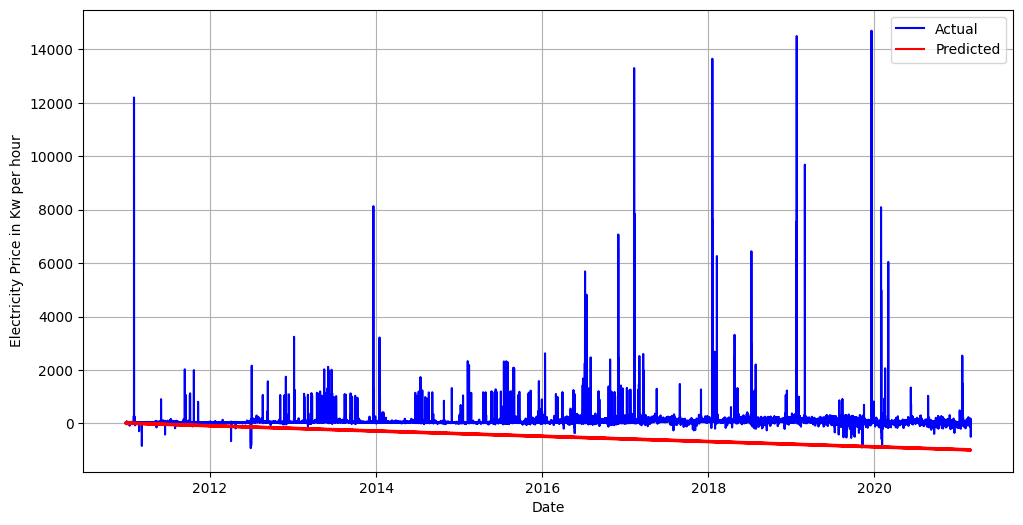

In [112]:
#visualize the predictions against the actual values
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Electricity Price in Kw per hour')
plt.legend()
plt.grid(True)
plt.show()

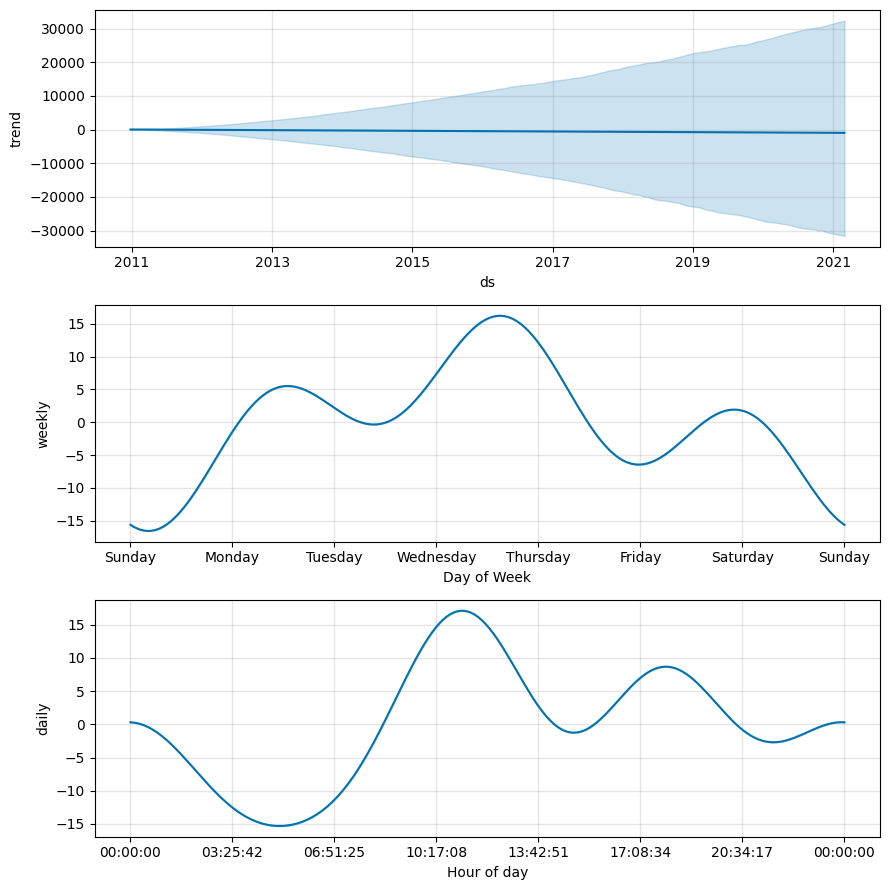

In [113]:
# Plot the components of the forecasted model
fig = model.plot_components(forecast)

# Show the plot
plt.show()

question 17-19

In [114]:
#split the data into train and test sets
train_df = electric_df.iloc[:2757]
test_df = electric_df.iloc[2757:]

# Rename the columns as required by Prophet ('ds' for time and 'y' for the target variable)
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
test_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)

# Create and train the multivariate forecast model
model = Prophet()
model.add_regressor('SysLoad')
model.add_regressor('Tmax')
model.add_regressor('GasPrice')
model.fit(train_df)

# Create the future dataframe with regressors for forecasting
future = model.make_future_dataframe(periods=len(test_df))
future['SysLoad'] = electric_df['SysLoad'].values
future['Tmax'] = electric_df['Tmax'].values
future['GasPrice'] = electric_df['GasPrice'].values



<ipython-input-114-063951d97e0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
<ipython-input-114-063951d97e0f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/35t4k8r_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/ltp_jfew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmds

In [115]:
# Make predictions for the test set
forecast = model.predict(future)
forecast = forecast.iloc[2757:]  # Slice the forecast to match the test set length

#calculate metrics
y_true = test_df['y'].values
y_pred = forecast['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Optional: Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Root Mean Squared Error (RMSE): 32954.73
Mean Squared Error (MSE): 1086014462.08
Mean Absolute Error (MAE): 28533.68
Mean Absolute Percentage Error (MAPE): inf% (optional)


<ipython-input-115-4ea44f14cde3>:14: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [116]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2757,2010-12-25 20:00:00,36.383099,-92.978864,152.737757,36.352929,36.383099,0.214344,0.214344,0.214344,3.805338,...,3.371644,3.371644,3.371644,-4.977148,-4.977148,-4.977148,0.0,0.0,0.0,30.962226
2758,2010-12-26 20:00:00,37.023925,-98.423316,163.797216,36.873814,37.142245,0.214344,0.214344,0.214344,-2.296555,...,-2.730248,-2.730248,-2.730248,-1.476920,-1.476920,-1.476920,0.0,0.0,0.0,29.001387
2759,2010-12-27 20:00:00,37.664751,-107.403092,151.379637,37.319668,37.999284,0.214344,0.214344,0.214344,-9.569038,...,-10.002731,-10.002731,-10.002731,-0.366263,-0.366263,-0.366263,0.0,0.0,0.0,23.480387
2760,2010-12-28 20:00:00,38.305577,-98.317533,150.093070,37.642477,38.934431,0.214344,0.214344,0.214344,-8.375923,...,-8.718970,-8.718970,-8.718970,0.769867,0.769867,0.769867,0.0,0.0,0.0,26.541104
2761,2010-12-29 20:00:00,38.946403,-77.295434,161.083343,37.913877,39.922728,0.214344,0.214344,0.214344,-6.959696,...,-7.302743,-7.302743,-7.302743,11.354101,11.354101,11.354101,0.0,0.0,0.0,39.182391


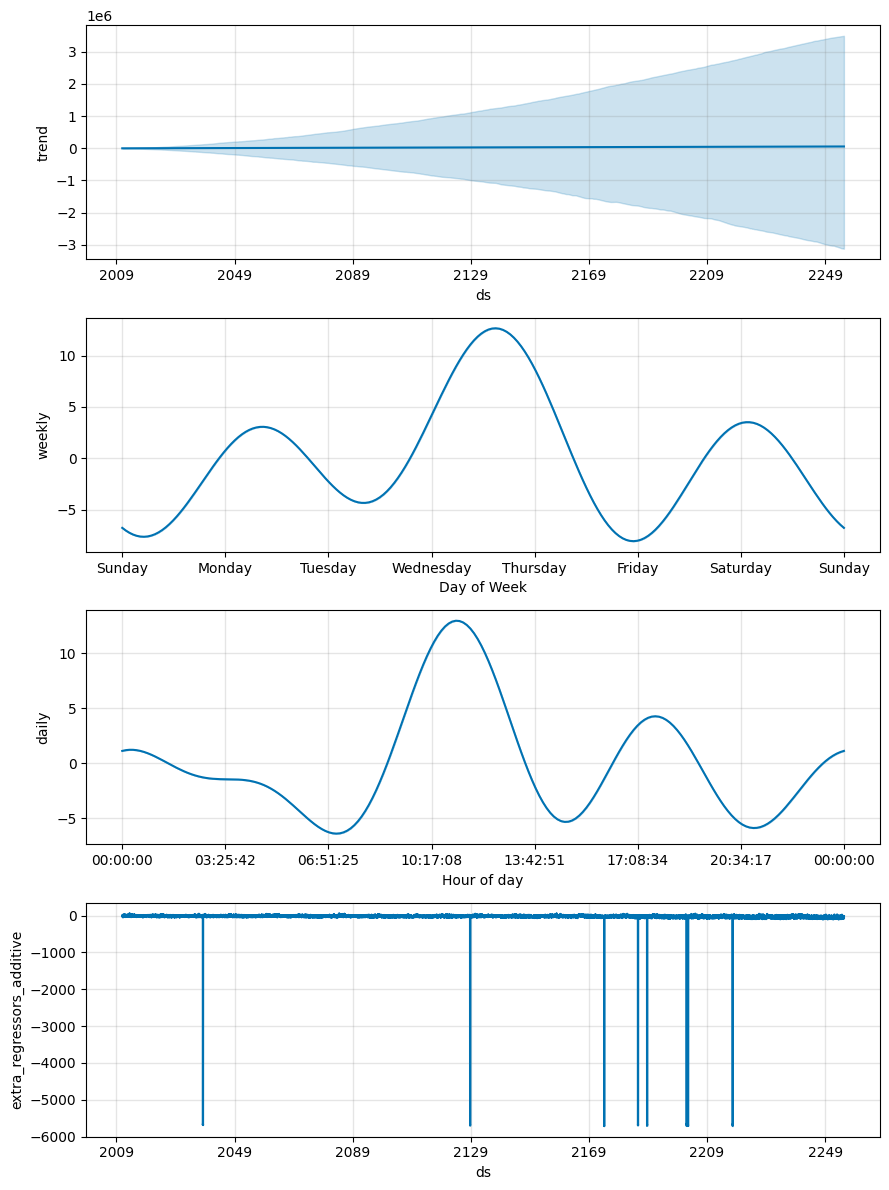

In [117]:
# Plot the components of the forecasted model
fig = model.plot_components(forecast)
# Show the plot
plt.show()

In [118]:
# Drop the 'Tmax' column from the training data
train_df.drop(columns=['Tmax'], inplace=True)

# Create and train the multivariate forecast model
model = Prophet()
model.add_regressor('SysLoad')
model.add_regressor('GasPrice')
model.fit(train_df[['ds', 'y', 'SysLoad', 'GasPrice']])

# Create the test set by excluding 'Tmax' from the test data
test_df.drop(columns=['Tmax'], inplace=True)

# Forecast on the test set
forecast = model.predict(test_df[['ds', 'SysLoad', 'GasPrice']])

# Calculate the Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    # Replace zero values with a small non-zero value to avoid division by zero
    actual[actual == 0] = 1e-10
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mape

# Calculate MAPE on the test set
mape_test = calculate_mape(test_df['y'], forecast['yhat'])

print(f'MAPE on test set: {mape_test:.2f}%')


<ipython-input-118-e9adddfbaf3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['Tmax'], inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/7p5y2nfu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqnpgf68/gt3c3y3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26054', 'data', 'file=/tmp/tmpnqnpgf68/7p5y2nfu.json', 'init=/tmp/tmpnqnpgf68/gt3c3y3r.json', 'output', 'file=/tmp/tmpnqnpgf68/prophet_modelbb9u722w/prophet_model-20230801192451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:51 - cmdstanpy 

MAPE on test set: 360607453526.78%
